In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
from sklearn import neighbors

# read the csv file into our data variable
data = pd.read_csv('breast-cancer.csv')
data



,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [17]:
# delete the unwanted id column
data.drop(['id'], 1, inplace=True) 
data

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [20]:

# make up for missing entries
data.replace('?', -9999, inplace=True)
data

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [21]:



# get our attributes and classes in place
X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])
X



array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [22]:

# get our attributes and classes in place

y = np.array(data['class'])
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
#feature dataset into tranig set and test set:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
# fitting naive bayes ti the traning test:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
#predicting test set results:
y_pred = classifier.predict(X_test)
y_pred

array([4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 2], dtype=int64)

In [36]:

#from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("confusion_matrix:",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9642857142857143
confusion_matrix: [[88  2]
 [ 3 47]]
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        90
           4       0.96      0.94      0.95        50

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [13]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Mean Error')

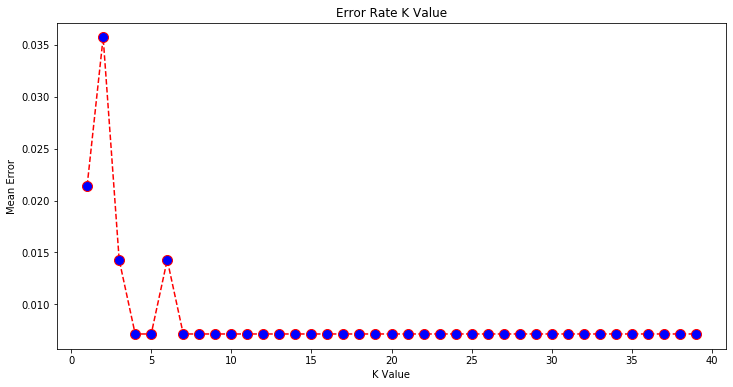

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [15]:

# calculating accuracy with test data
accuracy = knn.score(X_test, y_test)


# let's make a prediction
new_tests = np.array([[10, 10, 2, 3, 10, 2, 1, 8, 44], [10, 1, 12, 3, 1, 12, 1, 8, 12], [3, 1, 1, 3, 1, 12, 1, 2, 1]])
new_tests = new_tests.reshape(len(new_tests), -1)
prediction = knn.predict(new_tests)

# print out details
print ("Accuracy: ", accuracy)

print ("Predictions:")
for pred in prediction:
	if pred == 2:
		print (pred, "Benign")
	else: print (pred, "Malignant")


Accuracy:  0.9928571428571429
Predictions:
4 Malignant
4 Malignant
4 Malignant
